In [22]:
from IPython.core.display import display,HTML
display(HTML("<style>.container {width:95% ! important; }</style>"))

C:\Users\Ludovic\AppData\Local\Temp\ipykernel_11516\1894499714.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display,HTML


In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
plt.style.use("seaborn-whitegrid")
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=18)
plt.rc('legend', fontsize=14)
plt.rc('font', size=18)
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.major.size'] = 10

In [25]:
import pandas as pd

In [26]:
def add_txt_ticklabels(text='', ax=None, axis='y'):
    """
    Add text behind already existing ticklabels.
    Useful to add % and bps on axis
    """
    plt.draw()
    if ax is None:
        ax = plt.gca()
    
    if axis == 'y':
        previous_ticks_location = list(ax.get_yticks())
        previous_ticks_labels = list([x.get_text() for x in ax.get_yticklabels()])
        ax.set_yticks(previous_ticks_location)
        ax.set_yticklabels([f'{tick}{text}' for tick in previous_ticks_labels])
        
    if axis == 'x': 
        previous_ticks_location = list(ax.get_xticks())
        previous_ticks_labels = list([x.get_text() for x in ax.get_xticklabels()])
        ax.set_xticks(previous_ticks_location)
        ax.set_xticklabels([f'{tick}{text}' for tick in previous_ticks_labels])
        
        
def pivot_vol_matrix(df_vol):
    df_vol = pd.pivot_table(data=df_vol, columns='maturity', 
                            values=['95', '100', '105', '110', '115']).reset_index().rename(columns={'index': 'strike'})
    df_vol['strike'] = df_vol['strike'].astype(float)
    df_vol = df_vol.set_index('strike').sort_index()
    return(df_vol)


def display_test(test_name, maturities):
    vheston_imp_vol = pd.read_csv(f'vheston_imp_vol_{test_name}.csv', sep=',')
    market_vol =  pd.read_csv(f'market_vol_{test_name}.csv', sep=',')
    slv_imp_vol = pd.read_csv(f'slv_imp_vol_{test_name}.csv', sep=',')

    rename_dict = {'Unnamed: 0': 'maturity'}
    vheston_imp_vol.rename(columns=rename_dict, inplace=True)
    market_vol.rename(columns=rename_dict, inplace=True)
    slv_imp_vol.rename(columns=rename_dict, inplace=True)
    
    vheston_imp_vol = pivot_vol_matrix(vheston_imp_vol)
    market_vol = pivot_vol_matrix(market_vol)
    slv_imp_vol = pivot_vol_matrix(slv_imp_vol)
    
    for maturity in maturities:
        plt.figure(figsize=(10,8), dpi=100)
        plt.plot(vheston_imp_vol[maturity]*100, linestyle='--', marker='x', color='blue', label='Heston')
        plt.plot(market_vol[maturity]*100, linestyle='--', marker='o', color='green', label='Market volatility')
        plt.plot(slv_imp_vol[maturity]*100, linestyle='--', marker='v', color='orange', label='SLV')
        plt.xlabel('Strike')
        plt.ylabel('Implied volatility')
        plt.legend(frameon=True)
        add_txt_ticklabels(text='%', ax=None, axis='y')
        plt.title(f'Maturity = {maturity} years')

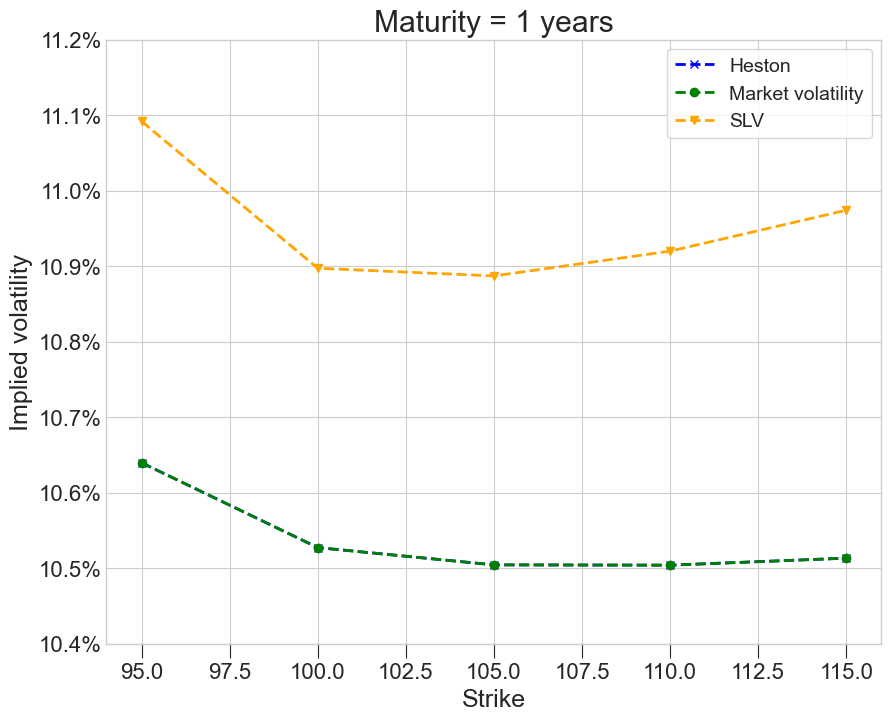

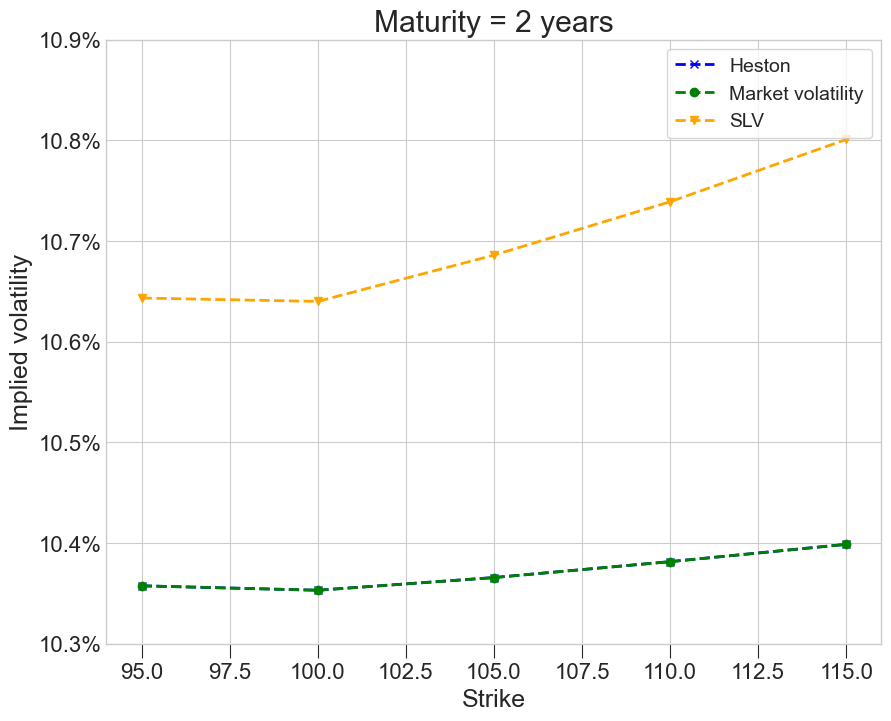

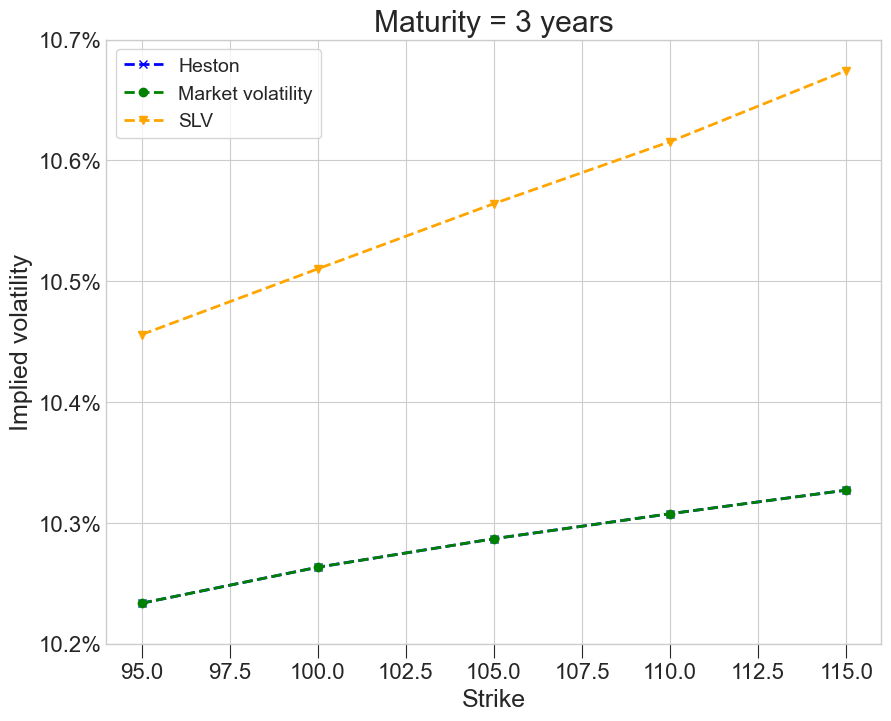

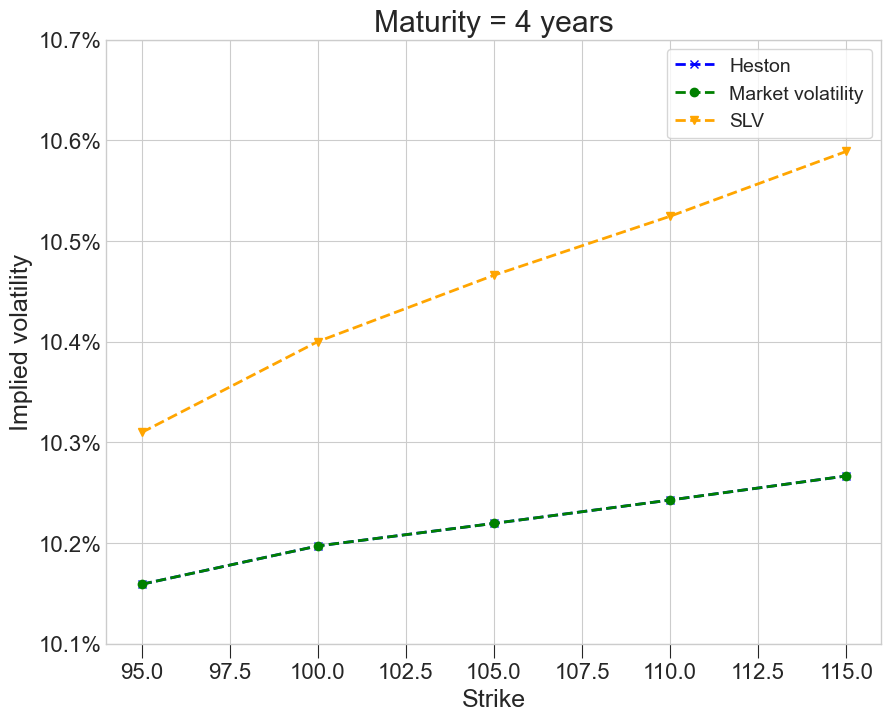

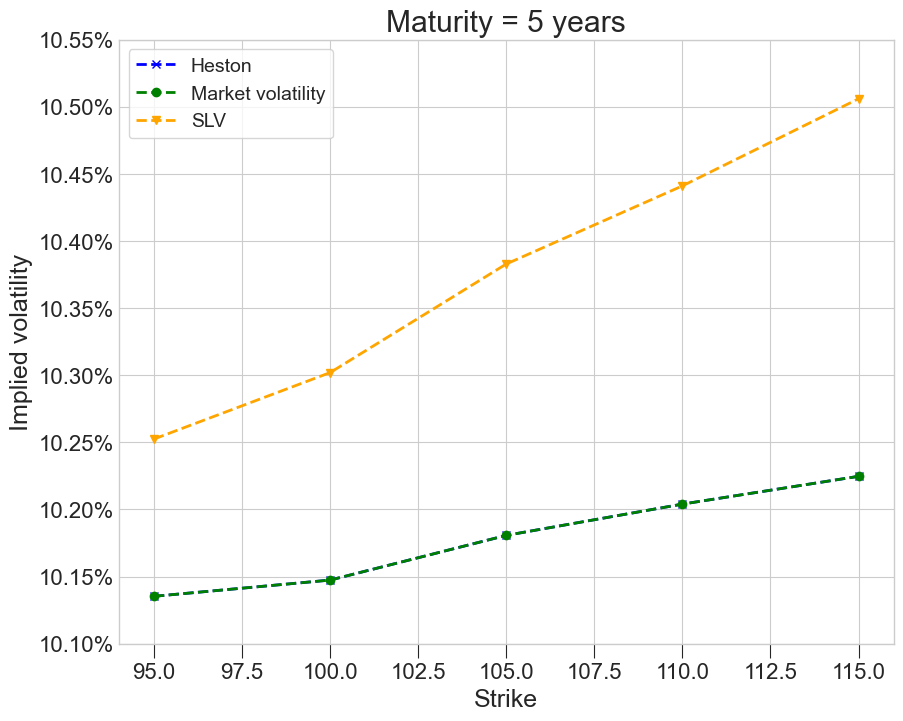

In [29]:
display_test('test_3', maturities=[1, 2, 3, 4, 5])